# Recommendation System For New Customers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
DataTable = pd.read_excel('Online Retail.xlsx')
DataTable.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
DataTable.shape 

(541909, 8)

In [4]:
DataTable.groupby('Description').agg(orders=('InvoiceNo', 'nunique'),quantity=('Quantity', 'sum')).sort_values(by='orders', ascending=False).head(10)

,orders,quantity
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,2302,35317
REGENCY CAKESTAND 3 TIER,2169,13033
JUMBO BAG RED RETROSPOT,2135,47363
PARTY BUNTING,1706,18022
LUNCH BAG RED RETROSPOT,1607,18779
ASSORTED COLOUR BIRD ORNAMENT,1467,36381
SET OF 3 CAKE TINS PANTRY DESIGN,1458,7336
PACK OF 72 RETROSPOT CAKE CASES,1334,36039
LUNCH BAG BLACK SKULL.,1295,12112


<Axes: xlabel='InvoiceNo'>

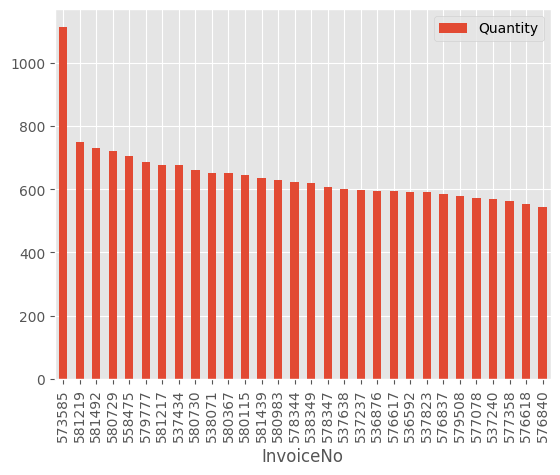

In [5]:
orders = pd.DataFrame(DataTable.groupby('InvoiceNo')['Quantity'].count())
highly_ordered = orders.sort_values('Quantity', ascending=False)
highly_ordered.head(30).plot(kind = "bar")

# Recommendation System based on purchase history

In [6]:
DataTable1 = DataTable.head(10000)

In [7]:
utility_matrix = DataTable1.pivot_table(values='Quantity', index='CustomerID', columns='InvoiceNo', fill_value=0)
utility_matrix.head()

InvoiceNo,536365,536366,536367,536368,536369,536370,536371,536372,536373,536374,...,C536978,C536979,C537024,C537039,C537043,C537132,C537143,C537157,C537164,C537203
CustomerID,,,,,,,,,,,,,,,,,,,,,
12395.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0,...,0,0,0,0,0.0,0,0,0,0,0
12427.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0,...,0,0,0,0,0.0,0,0,0,0,0
12431.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0,...,0,0,0,0,0.0,0,0,0,0,0
12433.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0,...,0,0,0,0,0.0,0,0,0,0,0
12471.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0,...,0,0,0,0,0.0,0,0,0,0,0


In [8]:
utility_matrix.shape

(323, 444)

In [9]:
X = utility_matrix.T
X.head()

CustomerID,12395.0,12427.0,12431.0,12433.0,12471.0,12472.0,12557.0,12567.0,12583.0,12600.0,...,18074.0,18085.0,18109.0,18118.0,18144.0,18156.0,18168.0,18225.0,18229.0,18239.0
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X.shape

(444, 323)

In [11]:
X1 = X

In [12]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(444, 10)

In [13]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(444, 444)

In [14]:
X.index[99]

536573

In [15]:
i = X.index[99]

description = list(X.index)
invoice_no = description.index(i)
invoice_no

99

In [16]:
correlation_invoice_no = correlation_matrix[invoice_no]
correlation_invoice_no.shape

(444,)

In [17]:
Recommend = list(X.index[correlation_invoice_no > 0.90])

Recommend.remove(i) 

Recommend[0:9]

[536367, 536368, 536369, 536374, 536381, 536385, 536388, 536390, 536395]

# Recommendation System based on Search Engine

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [19]:
descriptions = DataTable
descriptions.shape

(541909, 8)

In [20]:
descriptions = descriptions.dropna()
descriptions.shape
descriptions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
descriptions1 = descriptions.head(500)
descriptions1["Description"].head(10)

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
5           SET 7 BABUSHKA NESTING BOXES
6      GLASS STAR FROSTED T-LIGHT HOLDER
7                 HAND WARMER UNION JACK
8              HAND WARMER RED POLKA DOT
9          ASSORTED COLOUR BIRD ORNAMENT
Name: Description, dtype: object

In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(descriptions1["Description"])
X1

<500x492 sparse matrix of type '<class 'numpy.float64'>'
	with 2072 stored elements in Compressed Sparse Row format>

C:\Users\varig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


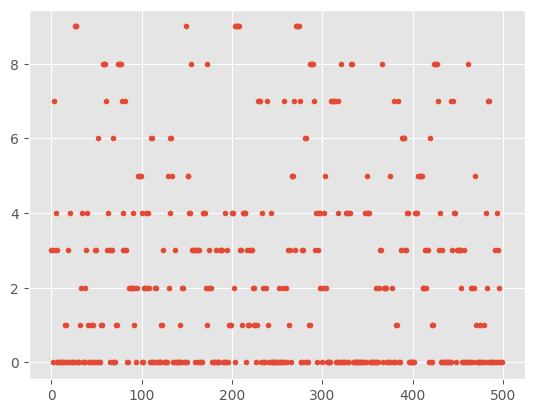

In [23]:
X=X1
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [24]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [25]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out() 
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 white
 frame
 lantern
 wooden
 finish
 metal
 antique
 wood
 ant
 cornice
Cluster 1:
 cake
 cases
 pack
 60
 72
 fairy
 teatime
 retrospot
 tier
 dinosaur
Cluster 2:
 small
 wicker
 heart
 popcorn
 basket
 picnic
 baskets
 lids
 oval
 holder
Cluster 3:
 retrospot
 bag
 red
 lunch
 jumbo
 box
 warmer
 hand
 set
 paper
Cluster 4:
 edwardian
 drawer
 parasol
 knob
 acrylic
 cabinet
 wood
 finish
 red
 white
Cluster 5:
 set
 jam
 making
 boxes
 nesting
 babushka
 candles
 ducks
 flying
 cookie
Cluster 6:
 bottle
 water
 hot
 vintage
 union
 mug
 hand
 assorted
 warmer
 sign
Cluster 7:
 clock
 bakelike
 alarm
 green
 wall
 diner
 red
 ivory
 orange
 blue
Cluster 8:
 star
 glass
 frosted
 light
 holder
 necklace
 crystal
 strand
 portable
 painted
Cluster 9:
 heart
 hanging
 light
 holder
 white
 red
 woolly
 hottie
 night
 led


In [26]:
def recommended(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

In [28]:
recommended("hot")

Cluster 6:
 bottle
 water
 hot
 vintage
 union
 mug
 hand
 assorted
 warmer
 sign
